In [219]:
import collections
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')
    
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable

In [249]:
default_random_seed = 444
sns.set(palette='colorblind', font_scale=1.3)

In [4]:
metadata_path = os.path.join(os.getcwd(), 'data/gtdb/bac120_metadata.tsv')
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

In [22]:
species_with_ogt_path = os.path.join(os.getcwd(), 'data/species_with_ogt.csv')
species_with_ogt_df = pd.read_csv(species_with_ogt_path)
species_with_ogt_df.shape

(2178, 3)

In [96]:
species_with_ogt_df.head()

,specie_name,temperature,temperature_range
0,Abiotrophia defectiva,37.0,mesophilic
1,Acetoanaerobium sticklandii,35.0,mesophilic
2,Acetobacter cerevisiae,26.0,mesophilic
3,Acetobacter cibinongensis,30.0,mesophilic
4,Acetobacter ghanensis,30.0,mesophilic


In [87]:
marker_info_path = os.path.join(os.getcwd(), 'data/gtdb/bac120_msa_marker_info.tsv')
marker_info_df = pd.read_csv(marker_info_path, delimiter='\t')
marker_info_df.head()

,Marker Id,Name,Description,Length (bp),Single copy (%),Ubiquity (%)
0,PFAM_PF00380.14,Ribosomal_S9,Ribosomal protein S9/S16,121,94.61,95.34
1,PFAM_PF00410.14,Ribosomal_S8,Ribosomal protein S8,129,93.32,93.93
2,PFAM_PF00466.15,Ribosomal_L10,Ribosomal protein L10,100,91.72,92.21
3,PFAM_PF01025.14,GrpE,GrpE,166,88.70,96.47
4,PFAM_PF02576.12,DUF150,"Uncharacterised BCR, YhbC family COG0779",141,82.98,83.47


In [95]:
marker_info_df.shape

(120, 6)

In [6]:
metadata_df.shape

(143512, 110)

In [8]:
metadata_df.columns.tolist()

['accession',
 'ambiguous_bases',
 'checkm_completeness',
 'checkm_contamination',
 'checkm_marker_count',
 'checkm_marker_lineage',
 'checkm_marker_set_count',
 'checkm_strain_heterogeneity',
 'coding_bases',
 'coding_density',
 'contig_count',
 'gc_count',
 'gc_percentage',
 'genome_size',
 'gtdb_genome_representative',
 'gtdb_representative',
 'gtdb_taxonomy',
 'gtdb_type_designation',
 'gtdb_type_designation_sources',
 'gtdb_type_species_of_genus',
 'l50_contigs',
 'l50_scaffolds',
 'longest_contig',
 'longest_scaffold',
 'lsu_23s_contig_len',
 'lsu_23s_count',
 'lsu_23s_length',
 'lsu_23s_query_id',
 'lsu_5s_contig_len',
 'lsu_5s_count',
 'lsu_5s_length',
 'lsu_5s_query_id',
 'lsu_silva_23s_blast_align_len',
 'lsu_silva_23s_blast_bitscore',
 'lsu_silva_23s_blast_evalue',
 'lsu_silva_23s_blast_perc_identity',
 'lsu_silva_23s_blast_subject_id',
 'lsu_silva_23s_taxonomy',
 'mean_contig_length',
 'mean_scaffold_length',
 'mimag_high_quality',
 'mimag_low_quality',
 'mimag_medium_quali

In [189]:
len(metadata_df), len(metadata_df['accession'].unique())

(143512, 143512)

In [86]:
for c in metadata_df.columns:
    print(c, '|', metadata_df.iloc[0][c])

accession | RS_GCF_001999625.1
ambiguous_bases | 0
checkm_completeness | 99.63
checkm_contamination | 0.01
checkm_marker_count | 475
checkm_marker_lineage | o__Lactobacillales (UID544)
checkm_marker_set_count | 267
checkm_strain_heterogeneity | 0.0
coding_bases | 2653992
coding_density | 88.1355099173
contig_count | 49
gc_count | 1123359
gc_percentage | 37.305838341
genome_size | 3011263
gtdb_genome_representative | RS_GCF_000392875.1
gtdb_representative | f
gtdb_taxonomy | d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus faecalis
gtdb_type_designation | not type material
gtdb_type_designation_sources | none
gtdb_type_species_of_genus | f
l50_contigs | 6
l50_scaffolds | 6
longest_contig | 634867
longest_scaffold | 634877
lsu_23s_contig_len | 4790
lsu_23s_count | 1
lsu_23s_length | 2908
lsu_23s_query_id | NZ_MTFY01000001.1
lsu_5s_contig_len | 121606
lsu_5s_count | 1
lsu_5s_length | 109
lsu_5s_query_id | NZ_MTFY01000014.1
lsu_silv

In [132]:
taxonomy = metadata_df['ssu_silva_taxonomy'].head().values
taxonomy[0].split(';')[-1].strip()

metadata_df['specie_name'] = metadata_df['ssu_silva_taxonomy'].apply(lambda v: v.split(';')[-1].strip())

In [133]:
metadata_df['phylum'] = metadata_df['gtdb_taxonomy'].apply(lambda v: v.split(';')[1].strip()[3:])

In [134]:
metadata_df['phylum'].head()

0          Firmicutes
1          Firmicutes
2      Proteobacteria
3    Actinobacteriota
4      Proteobacteria
Name: phylum, dtype: object

In [51]:
metadata_df['specie_name'].head()

0                              Enterococcus faecalis
1                Staphylococcus epidermidis NIHLM088
2                            Acinetobacter baumannii
3                                Mycobacterium bovis
4    Klebsiella pneumoniae subsp. pneumoniae KPNIH18
Name: specie_name, dtype: object

In [84]:
len(metadata_df['specie_name'].unique())

10782

In [139]:
len(metadata_df['gtdb_genome_representative'].unique())

23458

In [52]:
metadata_df['gtdb_genome_representative'].head()

0    RS_GCF_000392875.1
1    RS_GCF_002087975.1
2    RS_GCF_002811175.1
3    RS_GCF_000195955.2
4    RS_GCF_000742135.1
Name: gtdb_genome_representative, dtype: object

In [142]:
metadata_df['domain'] = 'Bacteria'

In [190]:
gtdb_simple_df = metadata_df[
    ['accession', 'specie_name', 'domain', 'phylum', 'gtdb_genome_representative']
].reset_index(drop=True)

merged_df = pd.merge(
    left=gtdb_simple_df,
    right=species_with_ogt_df,
    on='specie_name'
)
merged_df = merged_df.drop_duplicates(subset=['specie_name', 'gtdb_genome_representative'])
merged_df.shape

(1269, 7)

In [191]:
len(merged_df['specie_name'].unique())

720

In [192]:
merged_df.head()

,accession,specie_name,domain,phylum,gtdb_genome_representative,temperature,temperature_range
0,RS_GCF_001999625.1,Enterococcus faecalis,Bacteria,Firmicutes,RS_GCF_000392875.1,37.0,mesophilic
9,RS_GCF_000589255.1,Enterococcus faecalis,Bacteria,Proteobacteria,RS_GCF_000368085.1,37.0,mesophilic
14,RS_GCF_000204435.1,Enterococcus faecalis,Bacteria,Firmicutes,RS_GCF_000160875.1,37.0,mesophilic
22,RS_GCF_900407265.1,Enterococcus faecalis,Bacteria,Proteobacteria,RS_GCF_000742135.1,37.0,mesophilic
36,RS_GCF_001814125.1,Enterococcus faecalis,Bacteria,Firmicutes,RS_GCF_002901845.1,37.0,mesophilic


In [193]:
temperatures = merged_df['temperature'].values

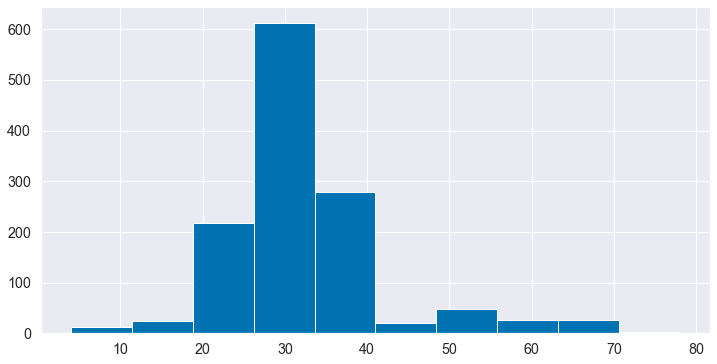

In [194]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))
_, bins, _ = ax.hist(temperatures, bins=10)

In [195]:
bins

array([ 4. , 11.4, 18.8, 26.2, 33.6, 41. , 48.4, 55.8, 63.2, 70.6, 78. ])

In [199]:
def balance_dataset(data_df, bins, max_items=50, random_seed=default_random_seed):
    rs = np.random.RandomState(random_seed)
    
    z_bins = list(zip(bins, bins[1:]))
    selected_indices = []
    for i, (low, high) in enumerate(z_bins):
        if i + 1 == len(z_bins):
            high += 1
        
        indices = data_df[
            (data_df['temperature'] >= low) &
            (data_df['temperature'] < high)
        ].index
        
        selected_indices += rs.choice(indices, size=min(max_items, len(indices)), replace=False).tolist()
        
    return data_df.loc[selected_indices].reset_index(drop=True)

In [200]:
balanced_df = balance_dataset(merged_df, bins)
balanced_df.shape

(310, 7)

In [201]:
balanced_df.head()

,accession,specie_name,domain,phylum,gtdb_genome_representative,temperature,temperature_range
0,RS_GCF_003259265.1,Gelidibacter algens,Bacteria,Bacteroidota,RS_GCF_001678675.1,10.0,psychrophilic
1,RS_GCF_000971275.1,Devosia psychrophila,Bacteria,Proteobacteria,RS_GCF_000971275.1,10.0,psychrophilic
2,RS_GCF_000196255.1,Photobacterium profundum,Bacteria,Proteobacteria,RS_GCF_000196255.1,10.0,psychrophilic
3,RS_GCF_001298525.1,Psychrobacter urativorans,Bacteria,Proteobacteria,RS_GCF_001298525.1,10.0,psychrophilic
4,RS_GCF_900177385.1,Carnobacterium iners,Bacteria,Firmicutes,RS_GCF_900177385.1,10.0,psychrophilic


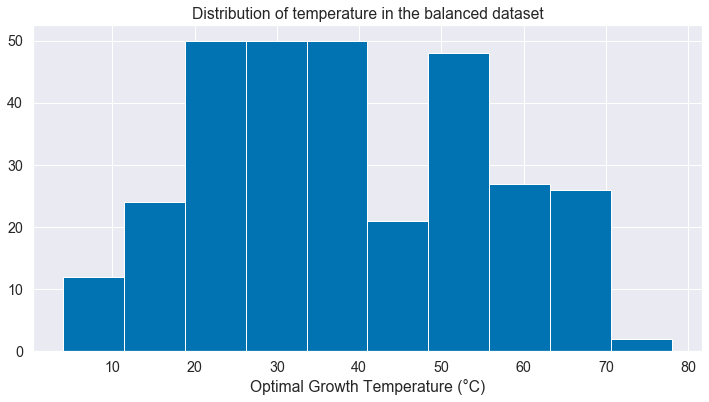

In [202]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))
_, bins, _ = ax.hist(balanced_df['temperature'].values, bins=10)
ax.set_title('Distribution of temperature in the balanced dataset');
ax.set_xlabel('Optimal Growth Temperature (°C)');

In [203]:
len(balanced_df) * 120

37200

In [204]:
balanced_df['temperature'].mean()

38.52903225806452

## Add sequences to dataset

In [205]:
fasta_path = os.path.join(os.getcwd(), 'data/gtdb/bac120_msa.faa')

In [206]:
def load_sequences(fasta_path):
    records = {}
    with open(fasta_path) as f:
        for record in SeqIO.parse(f, 'fasta'):
            records[record.id] = record.seq._data
    return records

In [207]:
sequences = load_sequences(fasta_path)

In [233]:
balanced_df['proteome'] = balanced_df['gtdb_genome_representative'].apply(
    lambda id_: ''.join(['-' if v == 'X' else v for v in sequences[id_]])
)

In [234]:
balanced_df.columns

Index(['accession', 'specie_name', 'domain', 'phylum',
       'gtdb_genome_representative', 'temperature', 'temperature_range',
       'proteome'],
      dtype='object')

In [235]:
def get_reversed_table():
    table = CodonTable.unambiguous_dna_by_id[1]
    reversed_table = collections.defaultdict(list)

    for codon in sorted(table.forward_table.keys()):
        reversed_table[table.forward_table[codon]].append(codon)

    return dict(reversed_table)

In [240]:
def reverse_translate(rs, amino_acid_sequence):
    table = get_reversed_table()
    
    mrna_sequence = ''
    for i, amino_acid in enumerate(amino_acid_sequence):
        if amino_acid == '-':
            codon = '---'
        else:
            choices = table[amino_acid]
            codon = rs.choice(choices)
        
        mrna_sequence += codon
    
    return mrna_sequence

In [241]:
get_reversed_table()

{'K': ['AAA', 'AAG'],
 'N': ['AAC', 'AAT'],
 'T': ['ACA', 'ACC', 'ACG', 'ACT'],
 'R': ['AGA', 'AGG', 'CGA', 'CGC', 'CGG', 'CGT'],
 'S': ['AGC', 'AGT', 'TCA', 'TCC', 'TCG', 'TCT'],
 'I': ['ATA', 'ATC', 'ATT'],
 'M': ['ATG'],
 'Q': ['CAA', 'CAG'],
 'H': ['CAC', 'CAT'],
 'P': ['CCA', 'CCC', 'CCG', 'CCT'],
 'L': ['CTA', 'CTC', 'CTG', 'CTT', 'TTA', 'TTG'],
 'E': ['GAA', 'GAG'],
 'D': ['GAC', 'GAT'],
 'A': ['GCA', 'GCC', 'GCG', 'GCT'],
 'G': ['GGA', 'GGC', 'GGG', 'GGT'],
 'V': ['GTA', 'GTC', 'GTG', 'GTT'],
 'Y': ['TAC', 'TAT'],
 'C': ['TGC', 'TGT'],
 'W': ['TGG'],
 'F': ['TTC', 'TTT']}

In [275]:
def extract_protein_sequences_and_back_translate(balanced_df, marker_info_df, random_seed=default_random_seed):
    rs = np.random.RandomState(random_seed)
    
    output = []
    output_columns = [
        'accession',
        'specie_name',
        'domain',
        'phylum',
        'gtdb_genome_representative',
        'temperature',
        'temperature_range',
        'gene_marker_id',
        'gene_name',
        'amino_acid_sequence',
        'mrna_candidate_sequence',
    ]
    
    for tpl in balanced_df.itertuples():
        proteome = str(tpl.proteome)
        
        for i, index in enumerate(marker_info_df.index):
            row = marker_info_df.loc[index]
            gene_marker_id = row['Marker Id']
            gene_name = row['Name']
            
            amino_acid_sequence = proteome[i*42:i*42 + 42]
            
            if len([v for v in amino_acid_sequence if v == '-']) == len(amino_acid_sequence):
                continue
            
            mrna_sequence_candidate = reverse_translate(rs, amino_acid_sequence)
            
            output.append([
                tpl.accession,
                tpl.specie_name,
                tpl.domain,
                tpl.phylum,
                tpl.gtdb_genome_representative,
                tpl.temperature,
                tpl.temperature_range,
                gene_marker_id,
                gene_name,
                amino_acid_sequence,
                mrna_sequence_candidate,
            ])
            
    return pd.DataFrame(output, columns=output_columns)

In [276]:
balanced_with_prots_df = extract_protein_sequences_and_back_translate(balanced_df, marker_info_df)

In [277]:
balanced_with_prots_df.head()

,accession,specie_name,domain,phylum,gtdb_genome_representative,temperature,temperature_range,gene_marker_id,gene_name,amino_acid_sequence,mrna_candidate_sequence
0,RS_GCF_003259265.1,Gelidibacter algens,Bacteria,Bacteroidota,RS_GCF_001678675.1,10.0,psychrophilic,PFAM_PF00380.14,Ribosomal_S9,ARAYVAKNIIPYSTYKPTNNGNFDVEALSREDANLLTVKKKF,GCTAGAGCTTACGTTGCAAAGAACATTATACCCTACTCAACGTATA...
1,RS_GCF_003259265.1,Gelidibacter algens,Bacteria,Bacteroidota,RS_GCF_001678675.1,10.0,psychrophilic,PFAM_PF00410.14,Ribosomal_S8,IYLTVVAHEIALETDQKSVKEPIKIKGASSEILAHTKHNVVY,ATCTACTTAACTGTCGTGGCCCACGAGATTGCGCTAGAGACCGACC...
2,RS_GCF_003259265.1,Gelidibacter algens,Bacteria,Bacteroidota,RS_GCF_001678675.1,10.0,psychrophilic,PFAM_PF00466.15,Ribosomal_L10,EVEELQTDISNNSELRFKAAVKTLLNKSDLSIMSEGNPKVIF,GAAGTCGAAGAGTTGCAAACTGACATTTCGAATAACTCAGAGCTCC...
3,RS_GCF_003259265.1,Gelidibacter algens,Bacteria,Bacteroidota,RS_GCF_001678675.1,10.0,psychrophilic,PFAM_PF01025.14,GrpE,NQL-EQLEDLDFKSLLLDESLEINFLEGTGNDLEAPSGIEYF,AATCAGCTA---GAGCAGTTAGAGGACCTAGATTTCAAGTCTCTCT...
4,RS_GCF_003259265.1,Gelidibacter algens,Bacteria,Bacteroidota,RS_GCF_001678675.1,10.0,psychrophilic,PFAM_PF02576.12,DUF150,---RDISVDGDVTSRAIEHDE-DSSRN--TDVGLDVLEKQLA,---------AGGGACATCTCCGTTGATGGGGACGTCACTAGCCGTG...


In [278]:
full_dataset_export_path = os.path.join(os.getcwd(), 'data/gtdb/dataset.csv')
# balanced_with_prots_df.to_csv(full_dataset_export_path, index=False)

## Split train / test sets

In [279]:
def split_train_test_set_per_specie(df, test_ratio=0.2, random_seed=default_random_seed):
    rs = np.random.RandomState(random_seed)
    
    representative_genomes = sorted(df['gtdb_genome_representative'].unique().tolist())
    
    n_seq = len(representative_genomes)
    test_species = rs.choice(representative_genomes, size=int(test_ratio * n_seq), replace=False)
    test_species_set = set(test_species.tolist())
    train_species = np.array([s for s in representative_genomes if s not in test_species_set])
    
    return (
        df[df['gtdb_genome_representative'].isin(train_species)].reset_index(drop=True),
        df[df['gtdb_genome_representative'].isin(test_species)].reset_index(drop=True),
    )

In [280]:
train_df, test_df = split_train_test_set_per_specie(balanced_with_prots_df)

In [281]:
len(train_df), len(test_df)

(29144, 7252)

In [282]:
train_dataset_export_path = os.path.join(os.getcwd(), 'data/gtdb/dataset_train.csv')
test_dataset_export_path = os.path.join(os.getcwd(), 'data/gtdb/dataset_test.csv')

# train_df.to_csv(train_dataset_export_path, index=False)
# test_df.to_csv(test_dataset_export_path, index=False)

In [290]:
def sanity_check_mrna_sequences(df):
    for i, tpl in enumerate(df.itertuples()):
        prot_seq = ''.join([v for v in tpl.amino_acid_sequence if v != '-'])
        
        seq = Seq(''.join([v for v in tpl.mrna_candidate_sequence if v != '-']))
        translated = seq.translate()._data
        
        assert translated == prot_seq, f'Error ar index {i}'
    
    return True

In [291]:
sanity_check_mrna_sequences(train_df)

True

In [292]:
sanity_check_mrna_sequences(test_df)

True

In [293]:
len(train_df['gtdb_genome_representative'].unique()), len(test_df['gtdb_genome_representative'].unique())

(244, 61)